In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os
from matplotlib.ticker import MultipleLocator, AutoMinorLocator, FormatStrFormatter, ScalarFormatter, LogLocator, LogFormatterSciNotation

In [49]:
N = 10*10**3
dimensions = [1,2,3,4]
alpha_g_f = 2.0
alpha_a_f = 2.0
alpha_g_v = [i for i in np.arange(1.0, 10.0, 0.5)]
#alpha_g_v = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0,7.0, 8.0, 9.0]
alpha_a_v = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,7.0, 8.0, 9.0]

dict_props = {"N":[], "dim":[], "alpha_g":[], "alpha_a":[], "L_weight":[],"L_weight_err":[],
              "D_weight":[], "D_weight_err":[], "L_BFS":[], "L_BFS_err":[], "D_BFS":[],"D_BFS_err":[]}

for dim in dimensions:
    for alpha_g in alpha_g_v:
        path_weight = f"../../data_2/N_{N}/dim_{dim}/alpha_a_{alpha_a_f:.2f}_alpha_g_{alpha_g:.2f}/prop"
        all_files_weight =  glob.glob(os.path.join(path_weight,"*.csv"))

        path_BFS = f"../../data/N_{N}/dim_{dim}/alpha_a_{alpha_a_f:.2f}_alpha_g_{alpha_g:.2f}/properties_set.txt"
        df_BFS = pd.read_csv(path_BFS, sep=' ')

        # Number of samples in navigation with coast
        N_s_weight = len(all_files_weight)

        L_BFS, L_b_err = df_BFS["#short_path"][0:N_s_weight].mean(), df_BFS["#short_path"][0:N_s_weight].sem()
        D_BFS, D_b_err = df_BFS["#diamater"][0:N_s_weight].mean(), df_BFS["#diamater"][0:N_s_weight].sem()

        L_w, D_w = [], []

        for file in all_files_weight:
            df = pd.read_csv(file, sep=',')
            L_weight, D_weight = df["#L_weight"].values, df["#D_weight"].values

            L_w.append(float(L_weight[0]))
            D_w.append(int(D_weight[0]))

        df_WEIGHT = pd.DataFrame(data={"L_weight":L_w, "D_weidth":D_w}) 
        L_WEIGTH, L_w_err = df_WEIGHT["L_weight"][0:N_s_weight].mean(), df_WEIGHT["L_weight"][0:N_s_weight].sem()
        D_WEIGTH, D_w_err = df_WEIGHT["D_weidth"][0:N_s_weight].mean(), df_WEIGHT["D_weidth"][0:N_s_weight].sem()

        dict_props["N"].append(N)
        dict_props["dim"].append(dim)
        dict_props["alpha_a"].append(alpha_a_f)
        dict_props["alpha_g"].append(alpha_g)

        dict_props["L_weight"].append(L_WEIGTH)
        dict_props["L_weight_err"].append(L_w_err)
        dict_props["D_weight"].append(D_WEIGTH)
        dict_props["D_weight_err"].append(D_w_err)

        dict_props["L_BFS"].append(L_BFS)
        dict_props["L_BFS_err"].append(L_b_err)
        dict_props["D_BFS"].append(D_BFS)
        dict_props["D_BFS_err"].append(D_b_err)

for dim in dimensions:
    for alpha_a in alpha_a_v:
        path_weight = f"../../data_2/N_{N}/dim_{dim}/alpha_a_{alpha_a:.2f}_alpha_g_{alpha_g_f:.2f}/prop"
        all_files_weight =  glob.glob(os.path.join(path_weight,"*.csv"))

        path_BFS = f"../../data/N_{N}/dim_{dim}/alpha_a_{alpha_a:.2f}_alpha_g_{alpha_g_f:.2f}/properties_set.txt"
        df_BFS = pd.read_csv(path_BFS, sep=' ')

        # Number of samples in navigation with coast
        N_s_weight = len(all_files_weight)

        L_BFS, L_b_err = df_BFS["#short_path"][0:N_s_weight].mean(), df_BFS["#short_path"][0:N_s_weight].sem()
        D_BFS, D_b_err = df_BFS["#diamater"][0:N_s_weight].mean(), df_BFS["#diamater"][0:N_s_weight].sem()

        L_w, D_w = [], []

        for file in all_files_weight:
            df = pd.read_csv(file, sep=',')
            L_weight, D_weight = df["#L_weight"].values, df["#D_weight"].values

            L_w.append(float(L_weight[0]))
            D_w.append(int(D_weight[0]))

        df_WEIGHT = pd.DataFrame(data={"L_weight":L_w, "D_weidth":D_w}) 
        L_WEIGTH, L_w_err = df_WEIGHT["L_weight"][0:N_s_weight].mean(), df_WEIGHT["L_weight"][0:N_s_weight].sem()
        D_WEIGTH, D_w_err = df_WEIGHT["D_weidth"][0:N_s_weight].mean(), df_WEIGHT["D_weidth"][0:N_s_weight].sem()

        dict_props["N"].append(N)
        dict_props["dim"].append(dim)
        dict_props["alpha_a"].append(alpha_a)
        dict_props["alpha_g"].append(alpha_g_f)

        dict_props["L_weight"].append(L_WEIGTH)
        dict_props["L_weight_err"].append(L_w_err)
        dict_props["D_weight"].append(D_WEIGTH)
        dict_props["D_weight_err"].append(D_w_err)

        dict_props["L_BFS"].append(L_BFS)
        dict_props["L_BFS_err"].append(L_b_err)
        dict_props["D_BFS"].append(D_BFS)
        dict_props["D_BFS_err"].append(D_b_err)

# Saving parameters
parms = {k: dict_props[k] for k in ["N", "dim", "alpha_a", "alpha_g"]}
df_parms = pd.DataFrame(data=parms)
df_parms.to_csv("../../scripts/python/parameters.csv", sep=",", index=False)


df_final = pd.DataFrame(data=dict_props)
df_final

,N,dim,alpha_g,alpha_a,L_weight,L_weight_err,D_weight,D_weight_err,L_BFS,L_BFS_err,D_BFS,D_BFS_err
0,10000,1,1.0,2.0,55.729987,8.611984,65026.747664,27096.477826,14.731914,0.190583,36.672897,0.475233
1,10000,1,1.5,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10000,1,2.0,2.0,4.736714,0.118196,243.308411,15.416703,13.668683,0.095818,33.177570,0.290875
3,10000,1,2.5,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10000,1,3.0,2.0,3.093454,0.053369,48.953271,1.506840,13.871667,0.087242,33.560748,0.290985
...,...,...,...,...,...,...,...,...,...,...,...,...
107,10000,4,2.0,5.0,10.315141,0.137950,266.294118,20.331785,11.110451,0.076899,27.847059,0.208036
108,10000,4,2.0,6.0,10.192045,0.140637,289.593023,24.283435,11.872578,0.073454,29.546512,0.209002
109,10000,4,2.0,7.0,9.998611,0.146008,261.211765,23.312348,12.405819,0.080357,30.635294,0.244174
110,10000,4,2.0,8.0,9.853019,0.130507,251.976471,17.098782,12.829580,0.071404,31.317647,0.237406


In [46]:
#"L_weight" L_weight_err
df_dd = df_final[(df_final["alpha_g"] == 2.0) & (df_final["dim"] == 1.0)]
for i, j, k in zip(df_dd["L_weight"], df_dd["L_weight_err"],df_dd["alpha_a"]):
    err_ = (j/i)*100
    print(f"error = {err_} to α_a = {k}")

error = 2.495310479832806 to α_a = 2.0
error = 2.890071261541531 to α_a = 0.0
error = 3.5291265860650074 to α_a = 1.0
error = 2.495310479832806 to α_a = 2.0
error = 1.7978311399467397 to α_a = 3.0
error = 2.540148962345782 to α_a = 4.0
error = 1.6742976143827568 to α_a = 5.0
error = 1.8360677327610395 to α_a = 6.0
error = 1.5596839535528941 to α_a = 7.0
error = 1.625634087051857 to α_a = 8.0
error = 1.5410713021035225 to α_a = 9.0


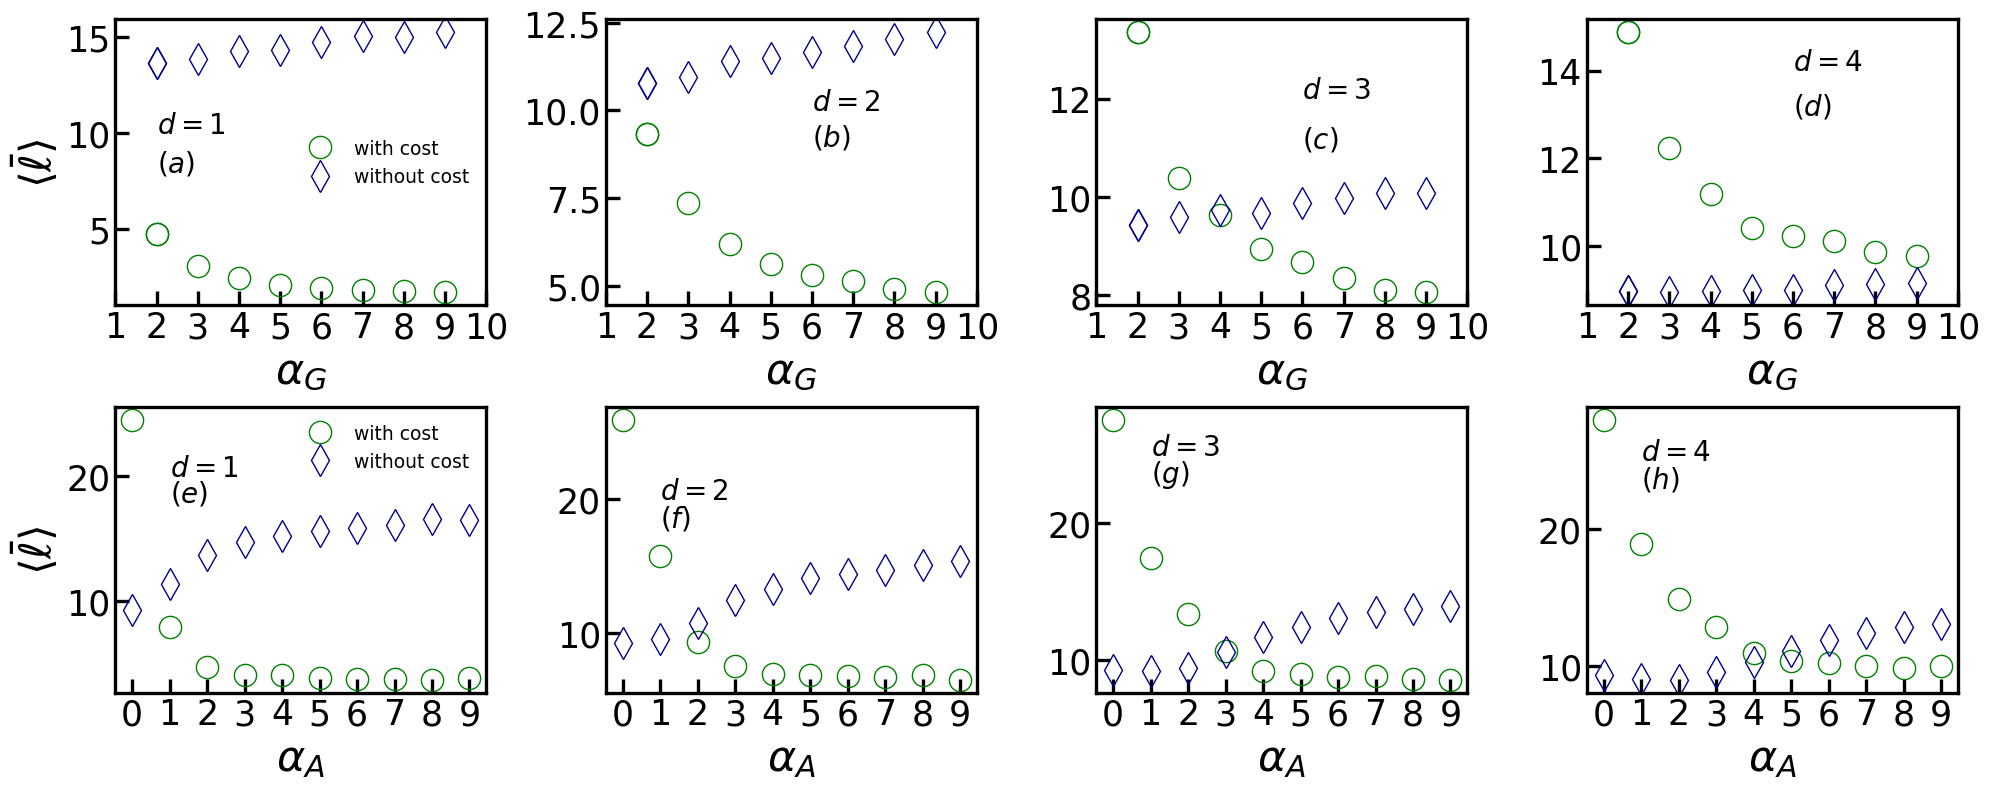

In [55]:
import matplotlib.pyplot as plt
import numpy as np

markers = ["o", "d", "^", "s", "D"]
color = ['#008000', "#00008B", "magenta", "darkgoldenrod"]

di = [1, 2, 3, 4]
fig, ax = plt.subplots(2, 4, figsize=(20, 8))
font_title = 10
markersize = 16
fonts_size = 45
label_tick_size = 25
eixo_tick_size = 31
thickness_axes = 2.4
dim_text_size = 20
mew = 3.0



label_fig = ["$(a)$","$(b)$","$(c)$","$(d)$",
             "$(e)$","$(f)$","$(g)$","$(h)$"]
dim_pos_1l = [(2,10), (6,10), (6,12), (6,14)]
label_fig_pos_1l = [(2,8), (6,9), (6,11), (6,13)]

dim_pos_2l = [(1,20), (1,20), (1,25), (1,25)]
label_fig_pos_2l = [(1,18), (1,18), (1,23), (1,23)]

# Linha de cima: fixo alpha_a = 2.0, variando alpha_g
for i, dim in enumerate(di):
    df = df_final[(df_final["dim"] == dim) & (df_final["alpha_a"] == 2.0)]
    ax[0, i].plot(df["alpha_g"][1:], df["L_weight"][1:], 'o', markerfacecolor='none', markersize=markersize, label='with cost', color='#008000')
    ax[0, i].plot(df["alpha_g"][1:], df["L_BFS"][1:], 'd', markerfacecolor='none', markersize=markersize, label='without cost', color="#00008B")
    
    ax[0, i].set_xlabel(r'$\alpha_G$', fontsize=eixo_tick_size)
    ax[0, 0].set_ylabel(r'$\langle \bar{\ell} \rangle$', fontsize=eixo_tick_size)

    # Ticks com espaçamento 1
    min_x, max_x = df["alpha_g"].min(), df["alpha_g"].max()
    ax[0, i].set_xticks(np.arange(np.floor(min_x), np.ceil(max_x)+1, 1))
    
    x, y = dim_pos_1l[i]
    ax[0, i].text(x=x, y=y, s=f"$d = {dim}$", fontsize=dim_text_size, color="black")
    
    x_lab, y_lab = label_fig_pos_1l[i]
    ax[0, i].text(x=x_lab, y=y_lab, s=label_fig[i], fontsize=dim_text_size, color="black")
    
    if i == 0:
        ax[0, i].legend(fontsize=0.3*fonts_size, frameon=0.0)
    for spine in ax[0, i].spines.values():
        spine.set_linewidth(thickness_axes)
    ax[0, i].tick_params(axis='both', which='major', direction='in', length=10, width=thickness_axes, colors='black')
    ax[0, i].tick_params(axis='both', which='minor', direction='in', length=3, width=thickness_axes, colors='black')
    ax[0, i].tick_params('both', labelsize=label_tick_size)
    


# Linha de baixo: fixo alpha_g = 2.0, variando alpha_a
for i, dim in enumerate(di):
    df = df_final[(df_final["dim"] == dim) & (df_final["alpha_g"] == 2.0)]
    ax[1, i].plot(df["alpha_a"][1:], df["L_weight"][1:], 'o', markerfacecolor='none', markersize=markersize, label='with cost', color='#008000')
    ax[1, i].plot(df["alpha_a"][1:], df["L_BFS"][1:], 'd', markerfacecolor='none', markersize=markersize, label='without cost', color="#00008B")
    
    ax[1, i].set_xlabel(r'$\alpha_A$', fontsize=eixo_tick_size)
    
    ax[1, 0].set_ylabel(r'$\langle \bar{\ell} \rangle$', fontsize=eixo_tick_size)

    # Ticks com espaçamento 1
    min_x, max_x = df["alpha_a"].min(), df["alpha_a"].max()
    ax[1, i].set_xticks(np.arange(np.floor(min_x), np.ceil(max_x)+1, 1))

    x, y = dim_pos_2l[i]
    ax[1, i].text(x=x, y=y, s=f"$d = {dim}$", fontsize=dim_text_size, color="black")
    
    x_lab, y_lab = label_fig_pos_2l[i]
    ax[1, i].text(x=x_lab, y=y_lab, s=label_fig[i+4], fontsize=dim_text_size, color="black")

    if i == 0:
        ax[1, i].legend(fontsize=0.3*fonts_size, frameon=0.0)
    for spine in ax[1, i].spines.values():
        spine.set_linewidth(thickness_axes)
    ax[1, i].tick_params(axis='both', which='major', direction='in', length=10, width=thickness_axes, colors='black')
    ax[1, i].tick_params(axis='both', which='minor', direction='in', length=3, width=thickness_axes, colors='black')
    ax[1, i].tick_params('both', labelsize=label_tick_size)
    
plt.tight_layout()
plt.savefig("../../results/L_vs_alpha_a_g_por_dim.pdf")
plt.show()